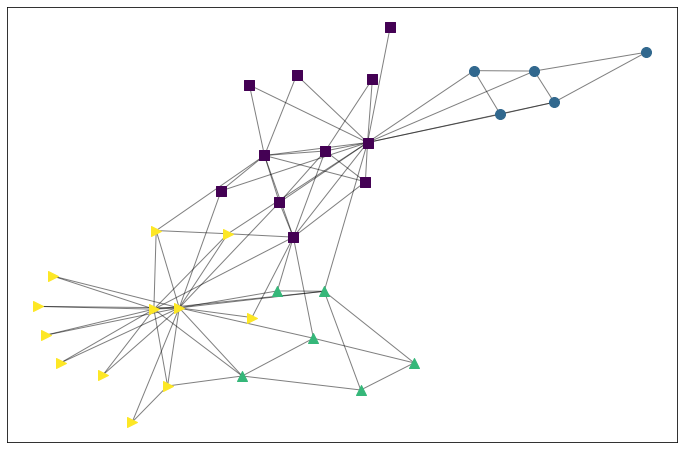

In [16]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
from cdlib import evaluation
# load the karate club graph
G = nx.karate_club_graph()

# compute the best partition
partition = community_louvain.best_partition(G)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
shapes = 'so^>v<dph8'

plt.figure(figsize=(12,8))
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_edges(G, pos, alpha=0.5)
for node, color in partition.items():
    nx.draw_networkx_nodes(G, pos, [node], node_size=100,
                           node_color=[cmap.colors[color]],
                           node_shape=shapes[color])

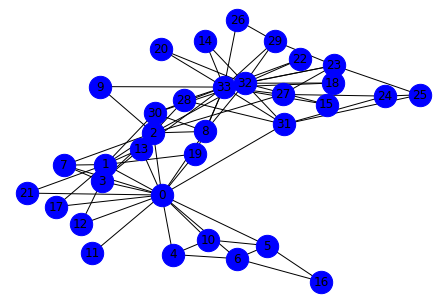

In [2]:
# help to draw https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
nx.draw(G,with_labels = True,node_color='b',node_size=500);

from node2vec import Node2Vec
# Generate walks
node2vec = Node2Vec(G, dimensions=2, walk_length=20, num_walks=10,workers=4)
# Learn embeddings 
model = node2vec.fit(window=10, min_count=1)
#model.wv.most_similar('1')
model.wv.save_word2vec_format("tmp/embedding.emb") #save the embedding in file embedding.emb

In [3]:
from sklearn.cluster import KMeans
import numpy as np


X = np.loadtxt("tmp/embedding.emb", skiprows=1) # load the embedding of the nodes of the graph
#print(X)
# sort the embedding based on node index in the first column in X
X=X[X[:,0].argsort()]; 
#print(X)
Z=X[0:X.shape[0],1:X.shape[1]]; # remove the node index from X and save in Z

kmeans = KMeans(n_clusters=4, random_state=0).fit(Z) # apply kmeans on Z
labels=kmeans.labels_  # get the cluster labels of the nodes.
print(labels)
print(np.where(labels==0))

[0 3 3 0 0 0 0 0 1 1 0 0 3 3 1 1 0 0 1 3 1 3 1 2 2 2 2 2 1 2 1 1 2 2]
(array([ 0,  3,  4,  5,  6,  7, 10, 11, 16, 17]),)


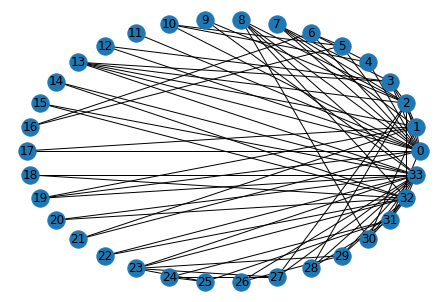

In [4]:
# partition
# print("Node Degree")
# for v in G:
#     print(f"{v:4} {G.degree(v):6}")

nx.draw_circular(G, with_labels=True)
plt.show()

In [5]:
 G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33))

In [6]:
from cdlib.algorithms import louvain
communities = louvain(G)
mod = communities.normalized_cut()
mod

FitnessResult(min=0.27702702702702703, max=0.4824561403508772, score=0.36627368162942225, std=0.07401419991827696)

False [[8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [1, 2, 3, 7, 9, 12, 13, 17, 19, 21], [0, 4, 5, 6, 10, 11, 16], [23, 24, 25, 27, 28, 31]]


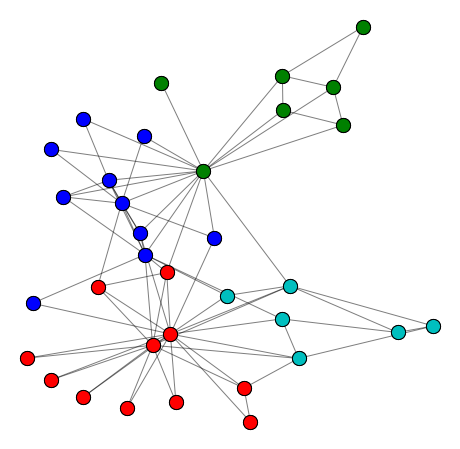

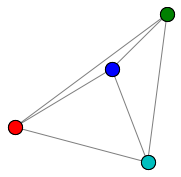

In [19]:
from cdlib import algorithms, viz
# coms = algorithms.kclique(G, k=4)
coms = algorithms.louvain(G)
# coms = algorithms.girvan_newman(G, level=4)
# coms = algorithms.aslpaw(G)
# coms = algorithms.mnmf(G)
# coms = algorithms.umstmo(G)
pos = nx.spring_layout(G, seed=42)
viz.plot_network_clusters(G, coms, pos)
viz.plot_community_graph(G, coms, figsize=(3, 3))
print(coms.overlap,coms.communities)

In [53]:
# names = ["Karate Club"]
# algos = [algorithms.leiden, algorithms.label_propagation]
# viz.plot_scoring([G], data.y.tolist(), names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)
# clusters = list(set(np.array(coms.communities)))
# print(clusters)
# parts_np = np.array(parts)
# metis_com = []
count = sum( [ len(listElem) for listElem in coms.communities])
my_parts = [0] * count
for i in range(len(coms.communities)):
    for x in coms.communities[i]:
        my_parts[x] = i
#     my_parts[coms.communities[i]] = [i]*len(coms.communities[i])

my_parts    
# cluster_membership = {node: membership for node, membership in enumerate(parts)}
# cluster_membership

[2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 0,
 0,
 3,
 0,
 0]

In [47]:
type(parts)

list

In [44]:
import metis
(st, parts) = metis.part_graph(G, 4)
clusters = list(set(parts))
# print(clusters)
parts_np = np.array(parts)
metis_com = []
for x in clusters:
    mytuple = np.where(parts_np==x)
#     result = [int(x) for x in mytuple]
    metis_com.append(mytuple[0].tolist())
print(parts_np)
print(metis_com)
print(coms.communities)
# print(type(metis_com[0]))

[0 0 2 0 1 1 1 0 3 2 0 1 0 1 3 3 1 0 3 0 2 3 2 2 1 2 3 3 2 2 3 1 2 3]
[[0, 1, 3, 7, 10, 12, 17, 19], [4, 5, 6, 11, 13, 16, 24, 31], [2, 9, 20, 22, 23, 25, 28, 29, 32], [8, 14, 15, 18, 21, 26, 27, 30, 33]]
[[8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33], [1, 2, 3, 7, 9, 12, 13, 17, 19, 21], [0, 4, 5, 6, 10, 11, 16], [23, 24, 25, 27, 28, 31]]


In [43]:
cluster_membership = {node: membership for node, membership in enumerate(parts)}
cluster_membership

{0: 0,
 1: 0,
 2: 2,
 3: 0,
 4: 1,
 5: 1,
 6: 1,
 7: 0,
 8: 3,
 9: 2,
 10: 0,
 11: 1,
 12: 0,
 13: 1,
 14: 3,
 15: 3,
 16: 1,
 17: 0,
 18: 3,
 19: 0,
 20: 2,
 21: 3,
 22: 2,
 23: 2,
 24: 1,
 25: 2,
 26: 3,
 27: 3,
 28: 2,
 29: 2,
 30: 3,
 31: 1,
 32: 2,
 33: 3}

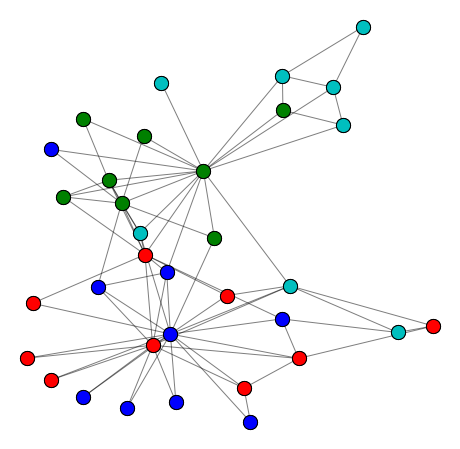

In [42]:
from cdlib import NodeClustering

communities_metis = metis_com #[[1,2,3], [4,5,6], [7,8,9,10,11]]
coms_metis = NodeClustering(communities_metis, graph=G, method_name="METIS")
viz.plot_network_clusters(G, coms_metis, pos)
# viz.plot_community_graph(G, coms_metis, figsize=(3, 3))

<AxesSubplot:xlabel='graph', ylabel='score'>

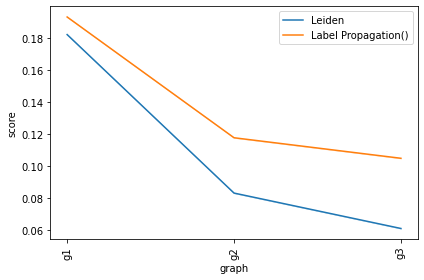

In [17]:
from cdlib import NodeClustering

g1 = nx.generators.LFR_benchmark_graph(1000, 3, 1.5, 0.5, min_community=20, average_degree=5)
g2 = nx.generators.LFR_benchmark_graph(1000, 3, 1.5, 0.6, min_community=20, average_degree=5)
g3 = nx.generators.LFR_benchmark_graph(1000, 3, 1.5, 0.7, min_community=20, average_degree=5)

names = ["g1", "g2", "g3"]
graphs = [g1, g2, g3]
references = []

# building the NodeClustering ground truth for the graphs
for g in graphs:
    ground_truth = NodeClustering(communities={frozenset(g.nodes[v]['community']) for v in g}, graph=g, method_name="reference")
    references.append(ground_truth)
    
algos = [algorithms.leiden, algorithms.label_propagation]

# Computing the visualization (2 execution per method, NMI as scoring for ground truth resemblance)
viz.plot_scoring(graphs, references, names, algos, scoring=evaluation.adjusted_mutual_information, nbRuns=2)

In [ ]:
G

In [11]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [12]:
import torch
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

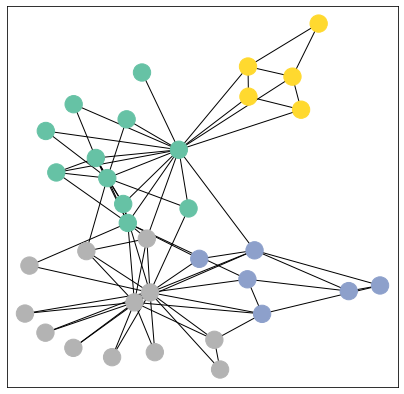

In [13]:
from torch_geometric.utils import to_networkx
data = dataset[0]  # Get the first graph object.
G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)